## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [148]:
import requests
from bs4 import BeautifulSoup as bs
from collections import defaultdict

# 爬取官方数据，爬取结果存储到lines字典，key：地铁线路名，value：线路站点列表
page = requests.get('https://www.bjsubway.com/station/xltcx/',verify=False)
soup = bs(page.content, "html.parser", fromEncoding="gb18030")
content = soup('div','line_content')[0]
line_name = content('div','line_name')
lines = defaultdict(list)
for node in content:
    if node.name != 'div':continue
    if node.attrs['class'][0] == 'line_name':
        line = node('div')[0].string
    else:
        station = node.string
        lines[line].append(station)

/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [156]:
# stations_graph 为站点间的连通图，key：站名，value：站能连通的站
stations_graph=defaultdict(list)

for line in lines:
    if line == '14号线':continue #14号线路数据有错误，不读取
    for i,station in enumerate(lines[line]):
        if i == 0:stations_graph[station].append(lines[line][i+1])
        elif i == len(lines[line])-1 :stations_graph[station].append(lines[line][i-1])
        else:
            stations_graph[station].append(lines[line][i-1])
            stations_graph[station].append(lines[line][i+1])


In [14]:
# 爬取百科的站点信息
import re
import requests
from collections import defaultdict
from bs4 import BeautifulSoup as bs
lines = defaultdict(list)
headers = {"Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3","Accept-Encoding":"gzip, deflate,br","Accept-Language":"zh-CN,zh;q=0.9","Cache-Control":"max-age=0","Connection":"keep-alive","Cookie":"BAIDUID=3772A80FE1270AC58C5053457D33C68B:FG=1; Hm_lvt_55b574651fcae74b0a9f1cf9c8d7c93a=1562541380; pgv_pvi=5577902080; pgv_si=s8879120384; Hm_lpvt_55b574651fcae74b0a9f1cf9c8d7c93a=1562541396","Host":"baike.baidu.com","Upgrade-Insecure-Requests":"1","User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}

# 获取百科地铁线路信息
page_base = requests.get('https://baike.baidu.com/item/北京地铁/408485',headers=headers,verify=False,allow_redirects=False)
soup = bs(page_base.content,'html.parser',fromEncoding='gb18030')
content = soup('table')[2]
pattern = r'<a href="(.*?)"\s+target="_blank">(.*?)</a>'
lines = re.findall(pattern,content.__str__())

# 保存各个线路以及线路的站点信息
# subways为字典，key：线路名称，value：线路的站点
stations=set()
subways = {}
url = 'https://baike.baidu.com'
def save_stations(path,headers):
    subways[path[1]]=list()
    page = requests.get(url+path[0],headers=headers,verify=False,allow_redirects=False)
    soup = bs(page.content,'html.parser',fromEncoding='gb18030')
    tables = soup('table')
    for i,table in enumerate(tables):
        if '车站名称' in table.strings:
            node = table
            break
        else:continue
    for tr in node('tr'):
        if len(tr('a')) == 0:continue
        name = tr('a')[0].string
        if not name or not name.strip():continue
        name = name.strip()
        stations.add(name)
        subways[path[1]].append(name)
        

for line in lines:
    save_stations(line,headers)
 



/usr/local/lib/python3.6/site-packages/urllib3/connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [184]:
# 此方法存在的问题： 
# 访问一个站点后，会将该站点存入visited中，但地铁线路复杂，会导致更优的路线访问不到


# 目前使用广度优先
# 由于站点信息太多，使用深度优先时会报错

result = set()

def search(start,end,graph):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop()
        front = path[-1]
        if front in visited:continue
        visited.add(front)
        for station in graph[front]:
            line = path+[station]
            if station == end:
                result.add(tuple(line))
            elif station in path:
                continue
            elif len(path)>=60:
                continue
            else:
                pathes=[line]+pathes
        visited.add(front)
    return result

# 默认最优为经过站点数量最少的路径
def get_best_path(start,end,graph):
    path = sorted(search(start,end,graph),key=lambda line:len(line))[0]
    return '->'.join(path)
        

In [185]:
def get_least_len(line):
    return len(line)
print(get_best_path('双井','西直门',stations_graph))

双井->国贸->永安里->建国门->朝阳门->东四->南锣鼓巷->什刹海->鼓楼大街->积水潭->西直门


In [188]:
# 不知道该怎么画图，通过百地图的获取经纬度接口，遍历了站点的经纬度，数据不准确

import json
url = "http://api.map.baidu.com/geocoder/v2/"
para = {"ak":"xxxx","city":"北京市","output":"json"}
station_location={}
filename = 'locations.txt'
def get_coordinate(stations):
    file = open(filename,'w')
    for loc in stations:
        para["address"] = loc
        try:
            r = requests.get(url,para)
        except Exception:
            print('there something wrong!')
        r = r.json()
        result = r.get('result','')
        if  result:
            location = result.get('location','')
            if location:
                lng = location.get('lng',0)
                lat = location.get('lat',0)
                print(loc,lng,lat)
                station_location[loc] = (lng,lat)
                file.write('%s,%s,%s\n' %(loc,str(lng),str(lat)))
        else:
            print("status wrong")
            continue
    file.close()

In [189]:
get_coordinate(stations_graph.keys())

苹果园 116.18963446946083 39.934641008155275
古城 100.2324803392115 26.883161684001312
八角游乐园 116.21884171520198 39.91306522416191
八宝山 116.24327328947903 39.920911909957624
玉泉路 116.25963607166538 39.92188360686101
五棵松 116.28217797586152 39.9418705099587
万寿路 116.30131575132756 39.916633467892005
公主坟 116.19429242607256 39.81074700702915
军事博物馆 116.33078176654712 39.91560053332307
木樨地 116.34049402024633 39.91406746721874
南礼士路 116.36004740034979 39.921458633384084
复兴门 116.35985412093626 39.91366077470702
西单 116.379282351811 39.91679779576148
天安门西 116.39701423513696 39.91367461017862
天安门东 116.40726021795322 39.91410696724626
王府井 116.46738784811086 39.88765922489592
东单 116.4249340123534 39.91478492712774
建国门 116.44226799215203 39.91453005191511
永安里 116.45905573752259 39.910516038804346
国贸 116.46783149874459 39.91879959387437
大望路 116.4815992209398 39.921827640269136
四惠 116.51463108233885 39.91166587774982
四惠东 116.52252188776905 39.91423992513861
西直门 116.35976447004637 39.947459826367805
积水潭 116.3810

光熙门 116.43882406848788 39.974317925815136
柳芳 116.4451104104467 39.961223269270135
俸伯 116.72459526308585 40.14211274747271
顺义 116.66142426369096 40.13635076223076
石门 111.386451407024 29.590365966649998
南法信 116.60748094954558 40.126955221063945
后沙峪 116.5514486726486 40.11176742159636
花梨坎 116.5537411384287 40.08435947746154
国展 116.44902145297604 39.96728989016636
孙河 116.54671902676566 40.05792837390953
马泉营 116.51581290833899 40.04388893210303
崔各庄 116.46863577412532 40.05580847036866
望京东 116.48934660381059 40.002410085222614
望京 116.48934660381059 40.002410085222614
关庄 116.44095520847975 40.0087481559251
安立路 116.41441143947401 40.02584850647795
北沙滩 116.38098920324609 40.010687789873025
六道口 116.47685182633658 39.854527714276664
清华东路西口 116.34483939348974 40.006275444643634
农大南路 116.30200421716194 40.03045659569204
马连洼 116.31166432961611 40.04208829179213
西北旺 116.27202541951321 40.047328887361665
永丰南 115.44740243988527 27.324342103714045
永丰 115.44740243988527 27.324342103714045
屯佃 116.22625057

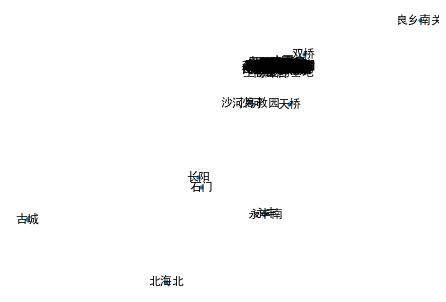

In [190]:
import networkx as nx
subway_graph = nx.Graph()
subway_graph.add_nodes_from(list(station_location.keys()))
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
nx.draw(subway_graph, station_location,with_labels=True, node_size=10)

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


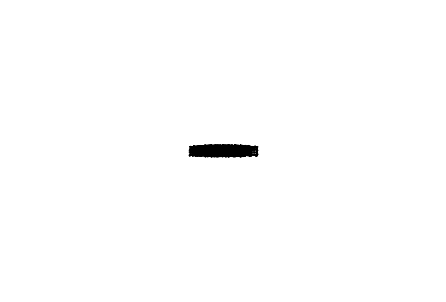

In [196]:
new_station_location= station_location
for station in stations_graph:
    new_station_location[station] = 0,0
    
new_station_location.update(station_location)
station_with_road = nx.Graph(stations_graph)
nx.draw(station_with_road, new_station_location, with_labels=True, node_size=30)

In [195]:
stations_graph

defaultdict(list,
            {'苹果园': ['古城', '金安桥', '杨庄'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '朝阳门', '北京站'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '金台夕照', '双井'],
             '大望路': ['国贸', '四惠'],
             '四惠': ['大望路', '四惠东', '四惠东'],
             '四惠东': ['四惠', '四惠', '高碑店'],
             '西直门': ['积水潭', 

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)